In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

**Latency Plot**

In [200]:
mean_latency = [2.3474518,2.659995,3.380402,5.312878,8.7840021,15.4122712,22.0142788]
std = [0.193221768, 0.140335683, 0.218967481, 0.144750281, 0.209133803, 0.372070439, 0.436864577]
max_latency = [5.241, 4.286, 6.595, 9.528, 10.165, 20.117, 27.816]
batch_size = [1,10,25,50,100,200,300]
throughput = [425.9938372,3759.405563,7395.570113,9411.095079,11384.33243,12976.67277,13627.51888]
slo = np.ones(len(batch_size))*20

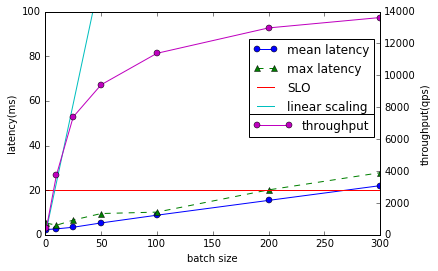

In [201]:
fig, ax = plt.subplots()
#ax.errorbar(batch_size, mean_latency, yerr=std, fmt='o-', label="mean latency")
ax.plot(batch_size, mean_latency, 'o-', label="mean latency")
ax.plot(batch_size, max_latency, '^--', label="max latency")
ax.plot(batch_size, slo, label='SLO')
ax.plot(batch_size, mean_latency[0]*np.array(batch_size), label='linear scaling')
ax2 = ax.twinx()
ax2.plot(batch_size, throughput,'o-', color='m', label="throughput")
ax2.set_ylabel('throughput(qps)')
#ax2.tick_params(axis='y', colors='m')
#ax2.set_yscale('log')

ax.set_ylim((0, 100))
ax.set_xlabel('batch size')
ax.set_ylabel('latency(ms)')
ax.legend(bbox_to_anchor=(1, 0.7),loc=5)
ax2.legend(bbox_to_anchor=(1,0.49),loc=5, handlelength=3.2)
fig.savefig('latency_tf.pdf',bbox_inches='tight')
plt.show()

**process the data**

In [189]:
f = open('./feature_lats/sklearn_svm_local.txt','r')
dic = {}
line = f.readline()
cnt = 0 
mean_sum = var_sum = max_sum = thru_sum =0
ind = 0
line_prev = ''
while line:
    if 'Args' in line:
        if cnt >0: 
            dic[ind] = {}
            dic[ind]['mean'] = mean_sum/cnt
            dic[ind]['var'] = var_sum/cnt
            dic[ind]['std'] = np.sqrt(var_sum/cnt)
            dic[ind]['max'] = max_sum/cnt
            dic[ind]['thru'] =thru_sum/cnt
            dic[ind]['#rec'] = cnt 
        cnt = 0
        mean_sum = var_sum = max_sum = thru_sum =0
    elif 'batch_size' in line:
        if 'Args' in line_prev:
            line_prev = line
            line = f.readline()
            continue
        else:
            cnt += 1
            str_list = line.split(',')
            assert len(str_list) == 5
            if not (ind == int(str_list[0].split(':')[1])):
                ind = int(str_list[0].split(':')[1])
            thru_sum += float(str_list[1].split(' ')[2])
            mean_sum += float(str_list[2].split(':')[1])
            var_sum += float(str_list[3].split(':')[1])
            max_sum += float(str_list[4].split(':')[1])
    line_prev = line
    line = f.readline()

## process the last one
if cnt >0: 
    dic[ind] = {}
    dic[ind]['mean'] = mean_sum/cnt
    dic[ind]['var'] = var_sum/cnt
    dic[ind]['std'] = np.sqrt(var_sum/cnt)
    dic[ind]['max'] = max_sum/cnt
    dic[ind]['thru'] =thru_sum/cnt
    dic[ind]['#rec'] = cnt 
f.close()

In [190]:
batch_size = [1,10,25,50,100,200]
mean_latency = [dic[ind]['mean'] for ind in batch_size]
std = [dic[ind]['std'] for ind in batch_size]
max_latency = [dic[ind]['max'] for ind in batch_size]
throughput = [dic[ind]['thru'] for ind in batch_size]
slo = np.ones(len(batch_size))*20

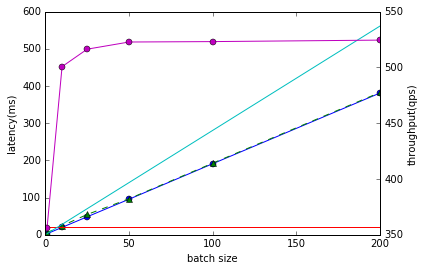

In [194]:
fig, ax = plt.subplots()

#ax.errorbar(batch_size, mean_latency, yerr=std, fmt='o-', label="mean latency")
ax.plot(batch_size, mean_latency, 'o-', label="mean latency")
ax.plot(batch_size, max_latency, '^--', label="max latency")
ax.plot(batch_size, slo, label='SLO')
ax.plot(batch_size, mean_latency[0]*np.array(batch_size), label='linear scaling')
ax2 = ax.twinx()
ax2.plot(batch_size, throughput,'o-', color='m', label="throughput")
ax2.set_ylabel('throughput(qps)')
#ax2.tick_params(axis='y', colors='m')
#ax2.set_yscale('log')

ax.set_ylim((0, 600))
ax.set_xlabel('batch size')
ax.set_ylabel('latency(ms)')
#ax.legend(bbox_to_anchor=(1, 0.67),loc=5)
#ax2.legend(bbox_to_anchor=(1,0.45),loc=5, handlelength=3.2)
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          #ncol=2, fancybox=True, shadow=True)
#ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          #ncol=2, fancybox=True, shadow=True)
fig.savefig('latency_sklearn_svm_local.pdf',bbox_inches='tight')
plt.show()

**plot cold start**

In [196]:
l2 = '0.356	0.31	0.24475	0.232	0.22075	0.2065	0.1995	0.173	0.1825	0.1865	0.17575	0.16525	0.1545	0.1505	0.156	0.15975	0.15725	0.1405	0.14925	0.1395	0.14825	0.14225	0.1405	0.14425	0.1355	0.1365	0.13625	0.13175'
l1 = "0.31725	0.286	0.24275	0.1975	0.1655	0.13875	0.1495	0.13725	0.14925	0.13	0.13375	0.1165	0.1195	0.137	0.12725	0.12925	0.1215	0.1265	0.119	0.11975	0.12075	0.109	0.1195	0.117	0.11875	0.1125	0.11425	0.1145"
indp = '0.36225	0.382	0.35275	0.359	0.33575	0.3565	0.34375	0.33675	0.3365	0.32	0.319	0.329	0.31725	0.317	0.319	0.298	0.30325	0.303	0.293	0.30375	0.289	0.2965	0.29325	0.2825	0.28075	0.28325	0.284	0.28475'
x = '2	3	4	5	6	7	8	9	10	11	12	13	14	15	16	17	18	19	20	21	22	23	24	25	26	27	28	29'

In [197]:
l2 = l2.split('\t')
l2 = [float(i) for i in l2]
l1=l1.split('\t') 
l1 = [float(i) for i in l1]
indp = indp.split('\t')
indp = [float(i) for i in indp]
x = x.split('\t')
x = [int(i) for i in x]

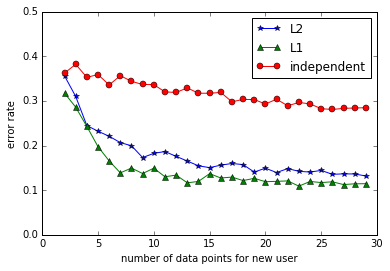

In [199]:
fig,ax = plt.subplots()
ax.plot(x, l2, '*-', label='L2')
ax.plot(x, l1, '^-', label='L1')
ax.plot(x, indp, 'o-', label='independent')
ax.set_xlabel('number of data points for new user')
ax.set_ylabel('error rate')
ax.set_ylim((0, 0.5))
ax.legend()
fig.savefig('cold_start.pdf', bbox_inches='tight')
plt.show()